# Author: Jose Garcia

In [1]:
from matplotlib import pyplot as plt
import cv2
import glob
import random
import numpy as np
import imutils
%matplotlib 

Using matplotlib backend: TkAgg


In [2]:
# How OpenCV manages images?

# Images are just arrays, let's see the first four rows of an image array
image = cv2.imread("images/hog_intro/DSCN0098.jpg")
image[0:4]


array([[[ 16,  11,  12],
        [ 17,  12,  13],
        [ 17,  12,  13],
        ...,
        [208, 208, 208],
        [208, 208, 208],
        [208, 208, 208]],

       [[ 16,  11,  12],
        [ 17,  12,  13],
        [ 17,  12,  13],
        ...,
        [208, 208, 208],
        [208, 208, 208],
        [208, 208, 208]],

       [[ 16,  11,  12],
        [ 17,  12,  13],
        [ 17,  12,  13],
        ...,
        [208, 208, 208],
        [208, 208, 208],
        [208, 208, 208]],

       [[ 16,  11,  12],
        [ 17,  12,  13],
        [ 17,  12,  13],
        ...,
        [208, 208, 208],
        [208, 208, 208],
        [208, 208, 208]]], dtype=uint8)

What did I print? What those numbers mean?

Most of the computers interpret an image as an array of color representation of 8 bits, this means, a number between 0 and 255. What you see in the last print statemen is this representation splitted into three different color channels: Red, Green and Blue, represented by a matrix that stores the pixels color representation of the image, this is what your computer 'sees' and that is why artificial vision applications requires some of math to be developed. For our fortune, OpenCV treats with it for us !!

<img src="images/teach/image_representation.png">

<hr>

The vectors inside our arrays represents the colors in a 8-bit resolution
<div style="width:200px;overflow:hidden">
    <div style="background-color:red;height:10px;width:10px;display:inline-block">
    </div>
    <div style="display:inline-block">
        Pure Red [255, 0, 0]
    </div>
</div>

<div style="width:400px;overflow:hidden">
    <div style="background-color:rgb(255,255,0);height:10px;width:10px;display:inline-block">
    </div>
    <div style="display:inline-block">
        Mix of Red and Green [255, 255, 0]
    </div>
</div>

<div style="width:400px;overflow:hidden">
    <div style="background-color:rgb(0,127,127);height:10px;width:10px;display:inline-block">
    </div>
    <div style="display:inline-block">
        Attenuate mix of Green and Blue [0, 127, 127]
    </div>
</div>

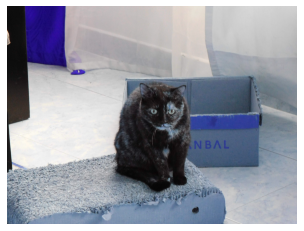

In [3]:
# Let's show the image to see how this array 'looks'
%matplotlib inline

plt.axis('off')
plt.imshow(image)
plt.show()

Why the first signal is plotted in a 'strange' way?

Images are treated as an array of three channels: Red, Green and Blue. Opencv treats with them as BGR while matplot treats with them as RGB.

Let's solve this

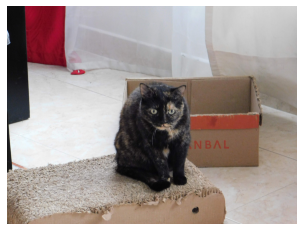

In [4]:
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.axis('off')
plt.imshow(image_rgb)
plt.show()

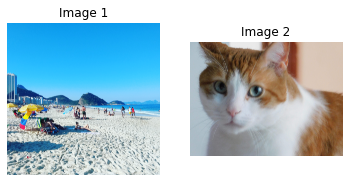

In [5]:
# let's plot other images

def retrieve_img_file_paths(path, img_format="jpg"):
    return glob.glob("{}/*.{}".format(path, img_format), recursive=True)

paths = retrieve_img_file_paths("images/hog_intro")

images = random.choices(paths, k=2)

plt.subplot(121)
plt.axis('off')
plt.title('Image 1')
plt.imshow(cv2.cvtColor(cv2.imread(images[0]), cv2.COLOR_BGR2RGB))
plt.subplot(122)
plt.axis('off')
plt.title('Image 2')
plt.imshow(cv2.cvtColor(cv2.imread(images[1]), cv2.COLOR_BGR2RGB))

In [6]:
# Images also has width and height

image_1 = cv2.imread(images[0])
image_2 = cv2.imread(images[1])
print(image_1.shape, image_2.shape)

(3024, 3024, 3) (3456, 4608, 3)


## Grayspace Images

From our previous job, we know that an image is represented as a RGB matrix, but to process a three columns matrix can be computationally costly and because of this many applications transforms the image in a vector array of 'gray' pixels intensities.

Be careful, a grayscale space vector does not mean black or white, it is a new representation of the RGB space:

Y = 0.299R + 0.587G + 0.114B

due to the cones and receptors in our eyes, we are able to perceive nearly 2x the amount of green than red. And similarly, we notice over twice the amount of red than blue. Thus, we make sure to account for this when converting from RGB to grayscale.

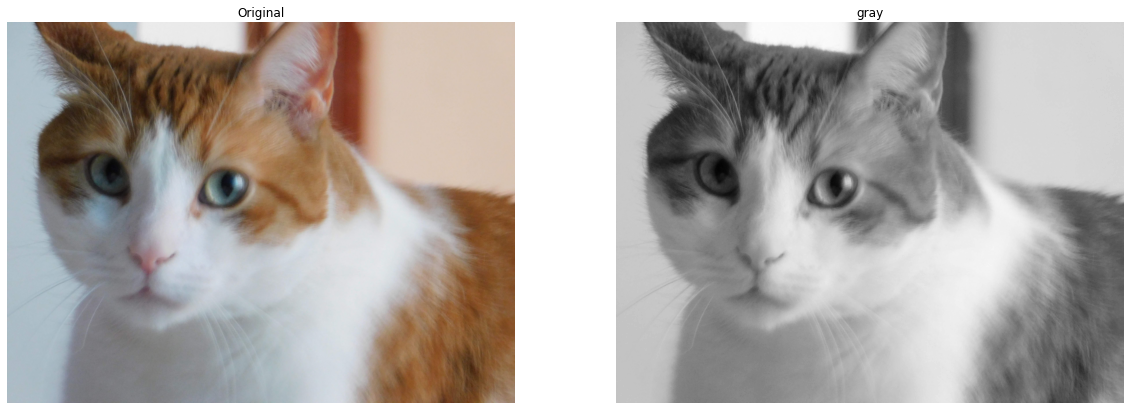

In [7]:
# Gray Scale Images

image = cv2.imread("images/hog_intro/DSCN0129.jpg")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(20, 20))
plt.subplot(121)
plt.title('Original')
plt.axis('off')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.subplot(122)
plt.title('gray')
plt.axis('off')
plt.imshow(gray, cmap='gray')

In [8]:
# Gray Scale images are just vectors, not arrays!!!!!

gray[0:4]

array([[182, 182, 182, ..., 198, 198, 198],
       [182, 182, 182, ..., 198, 198, 198],
       [182, 182, 182, ..., 198, 198, 198],
       [182, 182, 182, ..., 198, 198, 198]], dtype=uint8)

## Image histogram

Histograms capture the frequency distribution of a set of data. From [pyimagsearch blog](https://www.pyimagesearch.com/2014/01/22/clever-girl-a-guide-to-utilizing-color-histograms-for-computer-vision-and-image-search-engines/):  
"A histogram represents the distribution of pixel intensities (whether color or gray- scale) in an image. It can be visualized as a graph (or plot) that gives a high-level intuition of the intensity (pixel value) distribution. We are going to assume a RGB color space in this example, so these pixel values will be in the range of 0 to 255"

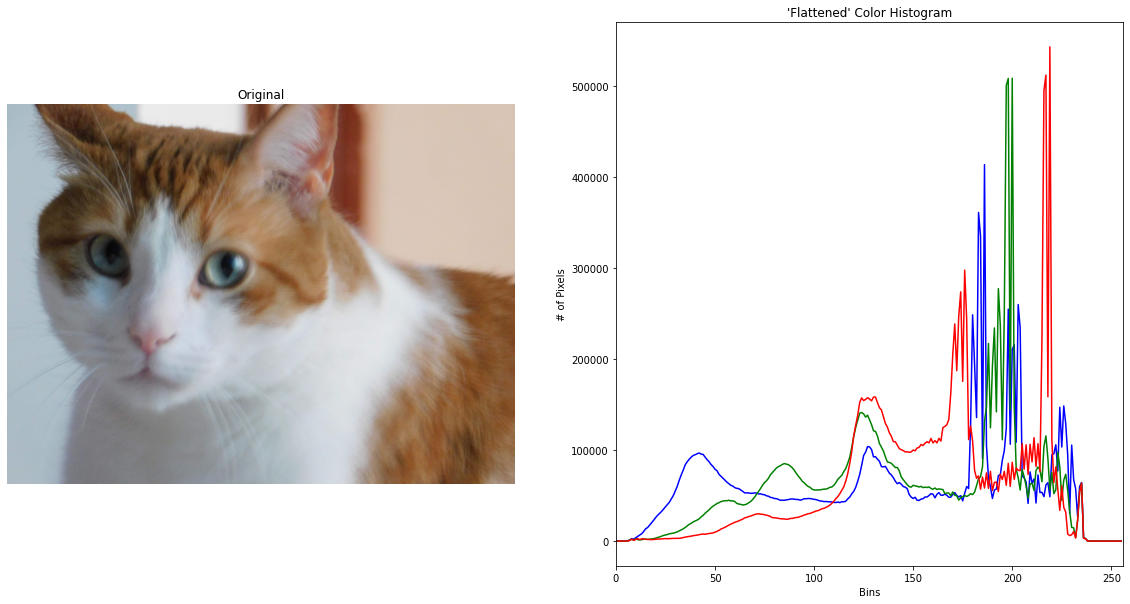

In [9]:
image = cv2.imread("images/hog_intro/DSCN0129.jpg")
chans = cv2.split(image)
colors = ("b", "g", "r")
plt.figure(figsize=(20, 10))

plt.subplot(121)
plt.title('Original')
plt.axis('off')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.subplot(122)

plt.title("'Flattened' Color Histogram")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")
 
for (chan, color) in zip(chans, colors):
    hist = cv2.calcHist([chan], [0], None, [256], [0, 256])
    plt.plot(hist, color = color)
    plt.xlim([0, 256])

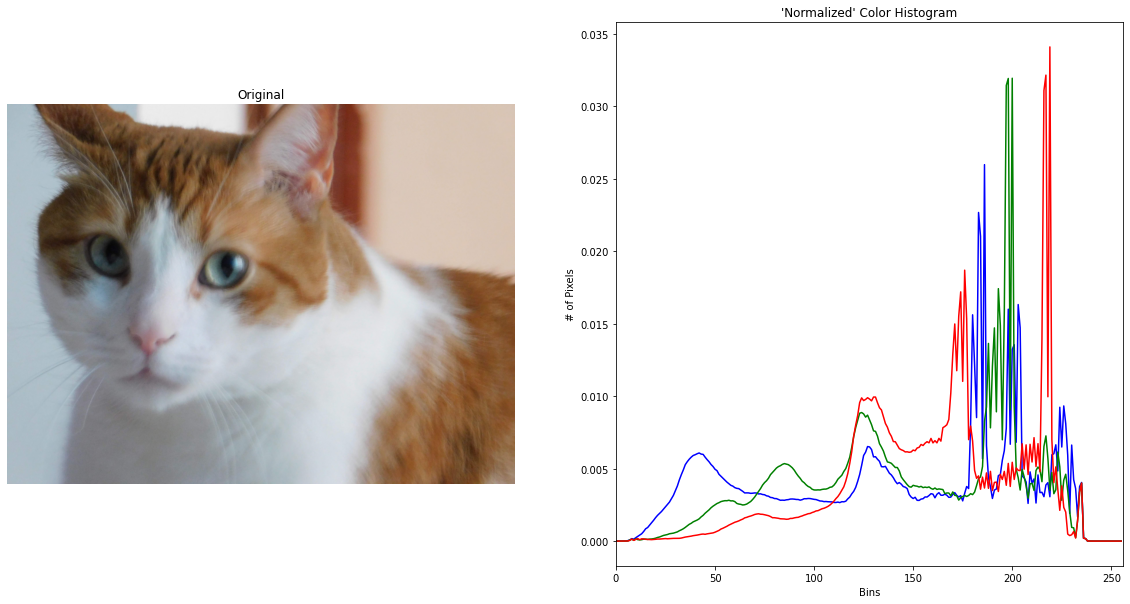

In [10]:
image = cv2.imread("images/hog_intro/DSCN0129.jpg")
chans = cv2.split(image)
colors = ("b", "g", "r")
plt.figure(figsize=(20, 10))

plt.subplot(121)
plt.title('Original')
plt.axis('off')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.subplot(122)

plt.title("'Normalized' Color Histogram")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")
 
for (chan, color) in zip(chans, colors):
    hist = cv2.calcHist([chan], [0], None, [256], [0, 256])
    hist = hist / hist.sum()
    plt.plot(hist, color = color)
    plt.xlim([0, 256])

(0.0, 256.0)

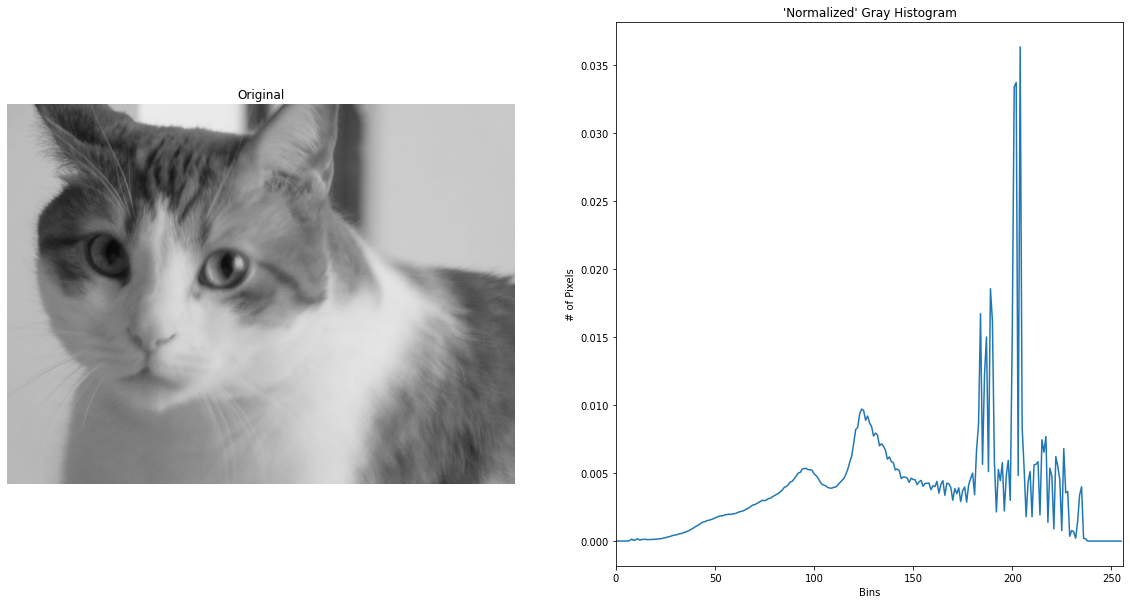

In [11]:
# Histograms in gray images
image = cv2.imread("images/hog_intro/DSCN0129.jpg", 0)
plt.figure(figsize=(20, 10))

plt.subplot(121)
plt.title('Original')
plt.axis('off')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.subplot(122)

plt.title("'Normalized' Gray Histogram")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")
 
hist = cv2.calcHist([image], [0], None, [256], [0, 256])
hist = hist / hist.sum()
plt.plot(hist)
plt.xlim([0, 256])

## Masks

We can also extract histograms from a certain part of the image, to do that we use masks.Masks are binary images of 0's and 1's. If we use a bitwise and operation between our original image and a mask, we can extract regions where the mask is equal to 1. Let's see it visually

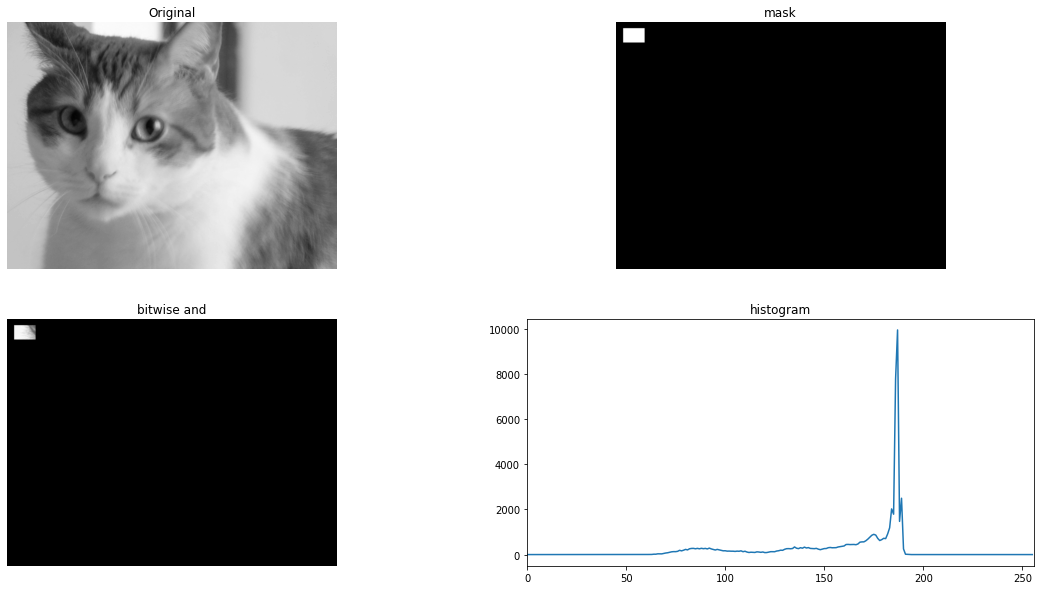

In [12]:
img = cv2.imread("images/hog_intro/DSCN0129.jpg", 0)

# create a mask
mask = np.zeros(img.shape[:2], np.uint8)
mask[100:300, 100:400] = 255
masked_img = cv2.bitwise_and(img,img,mask = mask)

# Calculate histogram with mask and without mask
# Check third argument for mask
hist_full = cv2.calcHist([img],[0],None,[256],[0,256])
hist_mask = cv2.calcHist([img],[0],mask,[256],[0,256])
plt.figure(figsize=(20, 10))
plt.subplot(221), plt.imshow(img, 'gray')
plt.title('Original')
plt.axis('off')
plt.subplot(222), plt.imshow(mask,'gray')
plt.title('mask')
plt.axis('off')
plt.subplot(223), plt.imshow(masked_img, 'gray')
plt.title('bitwise and')
plt.axis('off')
plt.subplot(224), plt.plot(hist_mask)
plt.title('histogram')
plt.xlim([0,256])
plt.show()

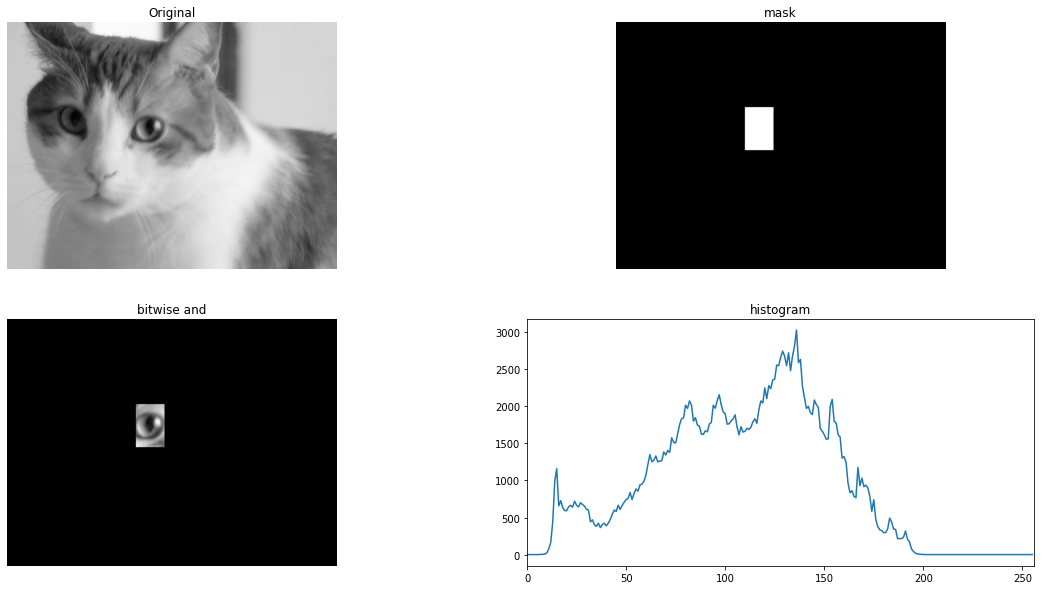

In [13]:
img = cv2.imread("images/hog_intro/DSCN0129.jpg", 0)

# create a mask
mask = np.zeros(img.shape[:2], np.uint8)
mask[1200:1800, 1800:2200] = 255
masked_img = cv2.bitwise_and(img,img,mask = mask)

# Calculate histogram with mask and without mask
# Check third argument for mask
hist_full = cv2.calcHist([img],[0],None,[256],[0,256])
hist_mask = cv2.calcHist([img],[0],mask,[256],[0,256])
plt.figure(figsize=(20, 10))
plt.subplot(221), plt.imshow(img, 'gray')
plt.title('Original')
plt.axis('off')
plt.subplot(222), plt.imshow(mask,'gray')
plt.title('mask')
plt.axis('off')
plt.subplot(223), plt.imshow(masked_img, 'gray')
plt.title('bitwise and')
plt.axis('off')
plt.subplot(224),plt.plot(hist_mask)
plt.title('histogram')
plt.xlim([0,256])
plt.show()

Text(0.5, 1.0, 'cat eye hist')

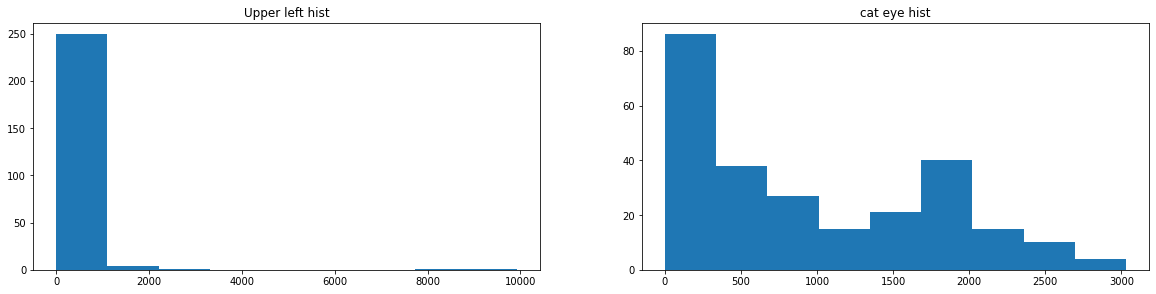

In [14]:
# plots the histogram using columns
mask_1 = np.zeros(img.shape[:2], np.uint8)
mask_1[100:300, 100:400] = 255
masked_img_1 = cv2.bitwise_and(img, img, mask = mask_1)

mask_2 = np.zeros(img.shape[:2], np.uint8)
mask_2[1200:1800, 1800:2200] = 255
masked_img_2 = cv2.bitwise_and(img, img, mask = mask_2)

hist_mask_1 = cv2.calcHist([img], [0], mask_1, [256], [0,256])
hist_mask_2 = cv2.calcHist([img], [0], mask_2, [256], [0,256])

plt.figure(figsize=(20, 10))
plt.subplot(221), plt.hist(hist_mask_1, bins=9, histtype='barstacked')
plt.title('Upper left hist')
plt.subplot(222), plt.hist(hist_mask_2, bins=9, histtype='barstacked')
plt.title('cat eye hist')



# Training our First detector

Now that we know the basics about digital images treatment using OpenCV and how histograms works, let's dive into the generalities to train our custom detector.

## Image normalization

To create a predictable system we need to pass to the detector canonical images, this means:

- We must define a fixed image size.
- We may test with different image equalization, like [gamma correction](https://www.cambridgeincolour.com/tutorials/gamma-correction.htm)



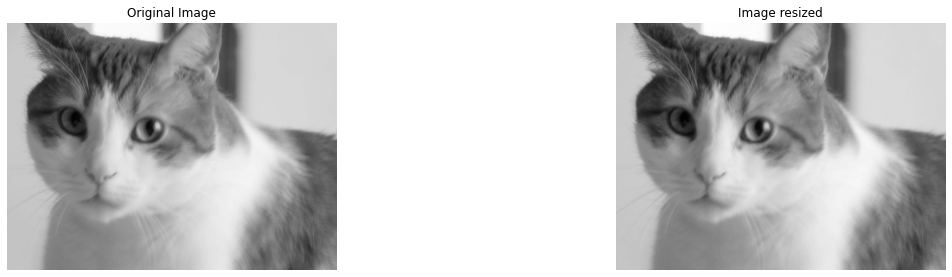

In [15]:
img = cv2.imread("images/hog_intro/DSCN0129.jpg", 0)
img_resized = imutils.resize(img, width=400)

# plots results

plt.figure(figsize=(20, 10))
plt.subplot(221), plt.imshow(img, 'gray')
plt.title('Original Image')
plt.axis('off')
plt.subplot(222), plt.imshow(img_resized, 'gray')
plt.title('Image resized')
plt.axis('off')
plt.show()

In [16]:
# Besides that both images seems equals, they have different sizes

print(f"Original image size: width: {img.shape[1]}, height: {img.shape[0]}")
print(f"Resized image size: width: {img_resized.shape[1]}, height: {img_resized.shape[0]}")

Original image size: width: 4608, height: 3456
Resized image size: width: 400, height: 300


## Feature selection

We will use histograms as our feature selection for the detector, this technique is called histogram descriptor. We need to compute some additional tasks to use histograms as image descriptors: We will use gradients to create vectors that describe our images based on their histograms.

<img src="images/teach/hog-cell-gradients.png">

source: https://www.learnopencv.com/histogram-of-oriented-gradients/

The way that we calculate vectors and their directions is as follows:

- Create two types of kernels: 

\begin{eqnarray}
G_{x} = I(x,y - 1) - I(x, y + 1) \\
G_{y} = I(x + 1,y) - I(x - 1, y)
\end{eqnarray}

- Calculate the vector magnitude and direction

\begin{eqnarray}
G = \sqrt{G_x^2 + G_y^2} \\
\theta = arctan2(G_y, G_x) * (180/\pi)
\end{eqnarray}

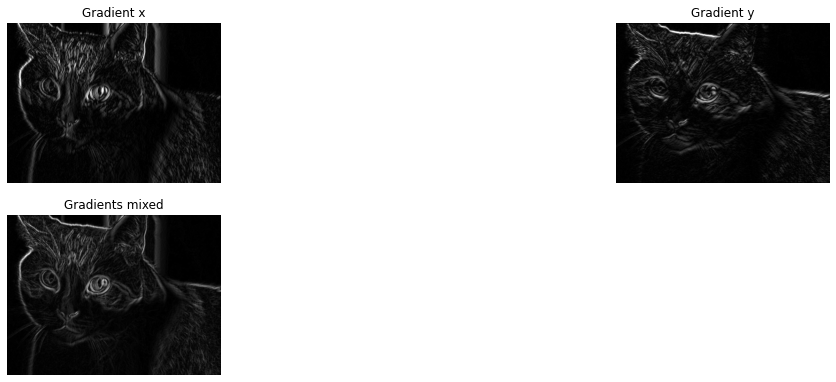

In [17]:
# Let's see how the gradients changes our image

img = cv2.imread("images/hog_intro/DSCN0129.jpg", 0)
img = imutils.resize(img, width=400)

# calculates gradients in x and y
gX = cv2.Sobel(img, ddepth=cv2.CV_64F, dx=1, dy=0)
gY = cv2.Sobel(img, ddepth=cv2.CV_64F, dx=0, dy=1)

# Normalizes histogram
gX = cv2.convertScaleAbs(gX)
gY = cv2.convertScaleAbs(gY)

# Combines both vector to see the key features in the image
sobelCombined = cv2.addWeighted(gX, 0.5, gY, 0.5, 0)

# plots results

plt.figure(figsize=(20, 10))
plt.subplot(321), plt.imshow(gX, 'gray')
plt.title('Gradient x')
plt.axis('off')
plt.subplot(322), plt.imshow(gY, 'gray')
plt.title('Gradient y')
plt.axis('off')
plt.subplot(323), plt.imshow(sobelCombined, 'gray')
plt.title('Gradients mixed')
plt.axis('off')
plt.show()

At the end, we should build an histogram where the bins are based on the calculated angles and the gradient magnitude.

<img src="https://gurus.pyimagesearch.com/wp-content/uploads/2015/03/hog_cell_magnitude-865x495.jpg">

Interesting reference sources to obtain further information about this:

- https://gurus.pyimagesearch.com/lesson-sample-histogram-of-oriented-gradients-and-car-logo-recognition/
- https://www.learnopencv.com/histogram-of-oriented-gradients/
- https://www.analyticsvidhya.com/blog/2019/09/feature-engineering-images-introduction-hog-feature-descriptor/

## Cell spliting

After have chosen our feature descriptor, we need to divide the image in cells, every cell will have a size in pixels that will give us their height and width. Cells are usually set to create squares rather than rectangles. To every cell created, we will retrieve it HOG descriptor using the previous seen concepts: Masks and gradients.

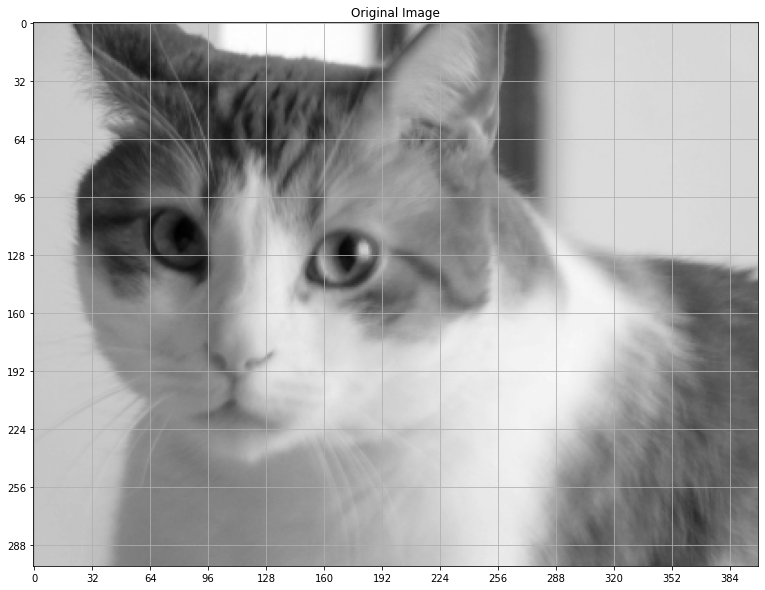

In [18]:
img = cv2.imread("images/hog_intro/DSCN0129.jpg", 0)
img = imutils.resize(img, width=400)
pixels_per_cel = (32, 32)

# plots results

fig = plt.figure(figsize=(20, 10))
ax = fig.gca()
ax.set_xticks(np.arange(0, img.shape[1], pixels_per_cel[0]))
ax.set_yticks(np.arange(0, img.shape[0], pixels_per_cel[1]))
plt.imshow(img, 'gray')
plt.title('Original Image')
plt.grid()
plt.show()



## Contrast normalization

As we are using a color distribution descriptor, and colors are just a numerical representation of the light experienced by a sensor we need to avoid lighting adversal effects. The effect of light comes in the way as the same image can be represented in the RGB color space, let's see the histograms for two images with different light conditions:

(0.0, 256.0)

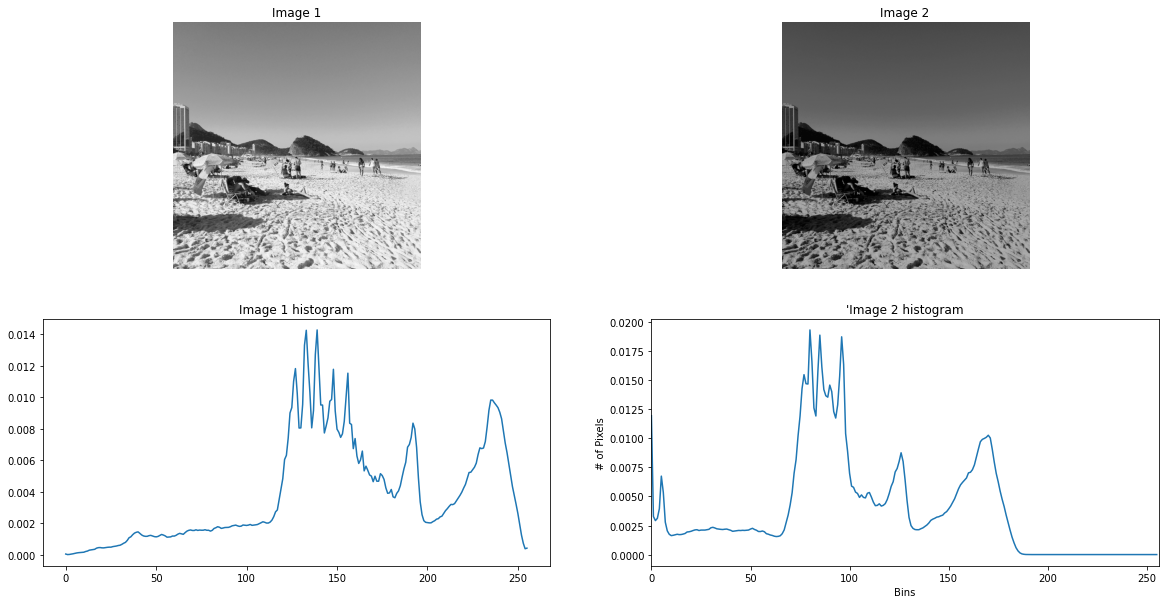

In [19]:
image_1 = cv2.imread("images/hog_intro/IMG_20190628_005108_721.jpg", 0)
image_2 = cv2.imread("images/hog_intro/IMG_20190628_005108_721_modified.jpg", 0)
plt.figure(figsize=(20, 10))

plt.subplot(221)
plt.axis('off')
plt.title('Image 1')
plt.imshow(cv2.cvtColor(image_1, cv2.COLOR_BGR2RGB))

plt.subplot(222)
plt.axis('off')
plt.title('Image 2')
plt.imshow(cv2.cvtColor(image_2, cv2.COLOR_BGR2RGB))

plt.subplot(223)
plt.title('Image 1 histogram')
hist = cv2.calcHist([image_1], [0], None, [256], [0, 256])
hist = hist / hist.sum()
plt.plot(hist)

plt.subplot(224)
plt.title("'Image 2 histogram")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")
hist = cv2.calcHist([image_2], [0], None, [256], [0, 256])
hist = hist / hist.sum()
plt.plot(hist)
plt.xlim([0, 256])

As you see in the previous example, if the same image is taken under different light conditions, this sort of change will give us a very different histogram. Besides of this, notice that both histograms have a similar shape, and we can take advantage of this by normalizing the image histograms of the cells that we analyze.

The way to treat with light effects, is to normalize the obtained histograms by analyzing blocks of cells. Let's see a brief explanation about this [written](https://www.analyticsvidhya.com/blog/2019/09/feature-engineering-images-introduction-hog-feature-descriptor/) by Aishwarya Singh:

<img src="https://cdn.analyticsvidhya.com/wp-content/uploads/2019/08/article-image-7.png">

> Here, we will be combining four 8×8 cells to create a 16×16 block. And we already know that each 8×8 cell has a 9×1 matrix for a histogram. So, we would have four 9×1 matrices or a single 36×1 matrix. To normalize this matrix, we will divide each of these values by the square root of the sum of squares of the values. Mathematically, for a given vector V:

\begin{eqnarray}
V = [a1, a2, a3, ….a36] \\
k = √(a1)²+ (a2)²+ (a3)²+ …. (a36)² \\
V_N = \begin{vmatrix}
\frac{a_1}{k}, ..., \frac{a_n}{k}
\end{vmatrix}
\end{eqnarray}

> The resultant would be a normalized vector of size 36×1.

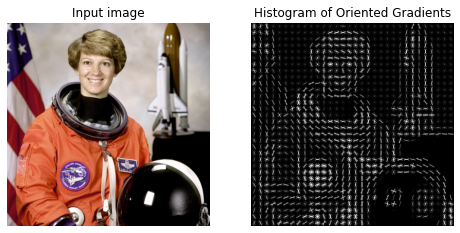

In [20]:
# let's finally plot a HOG and see how it goes!

from skimage.feature import hog
from skimage import data, exposure


image = data.astronaut()

fd, hog_image = hog(image, orientations=8, pixels_per_cell=(16, 16),
                    cells_per_block=(1, 1), visualize=True, multichannel=True)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(image, cmap=plt.cm.gray)
ax1.set_title('Input image')

# Rescale histogram for better display
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')
plt.show()


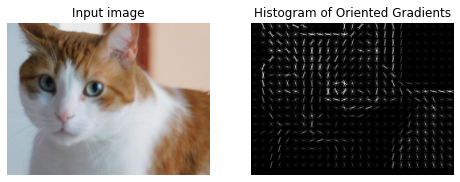

In [21]:
# let's finally plot a HOG and see how it goes!

from skimage.feature import hog
from skimage import data, exposure


image = cv2.imread("images/hog_intro/DSCN0129.jpg")
image = imutils.resize(image, width=400)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

fd, hog_image = hog(image, orientations=8, pixels_per_cell=(16, 16),
                    cells_per_block=(1, 1), visualize=True, multichannel=True)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(image, cmap=plt.cm.gray)
ax1.set_title('Input image')

# Rescale histogram for better display
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')
plt.show()


## Support Vector Machines

Source: https://www.datacamp.com/community/tutorials/svm-classification-scikit-learn-pythonb

> SVM offers very high accuracy compared to other classifiers such as logistic regression, and decision trees. It is known for its kernel trick to handle nonlinear input spaces. It is used in a variety of applications such as face detection, intrusion detection, classification of emails, news articles and web pages, classification of genes, and handwriting recognition. The core idea of SVM is to find a maximum marginal hyperplane(MMH) that best divides the dataset into classes.

<img src="http://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1526288453/index3_souoaz.png">

For our classifier, we will train a SVM with the HOG descriptors as input data. Fortunately, all the code to do this is already implemented at the dlib library.

We will use the caltech dataset available at http://www.vision.caltech.edu/Image_Datasets/Caltech101/

In [22]:
from imutils import paths
from scipy.io import loadmat
from skimage import io
import argparse
import dlib

image = cv2.imread("images/dataset/101_ObjectCategories/stop_sign/image_0037.jpg")
annotations_path = "images/dataset/Annotations/stop_sign/annotation_0037.mat"
annotations = loadmat(annotations_path)["box_coord"]
print(annotations)

[[ 34 130  43 141]]


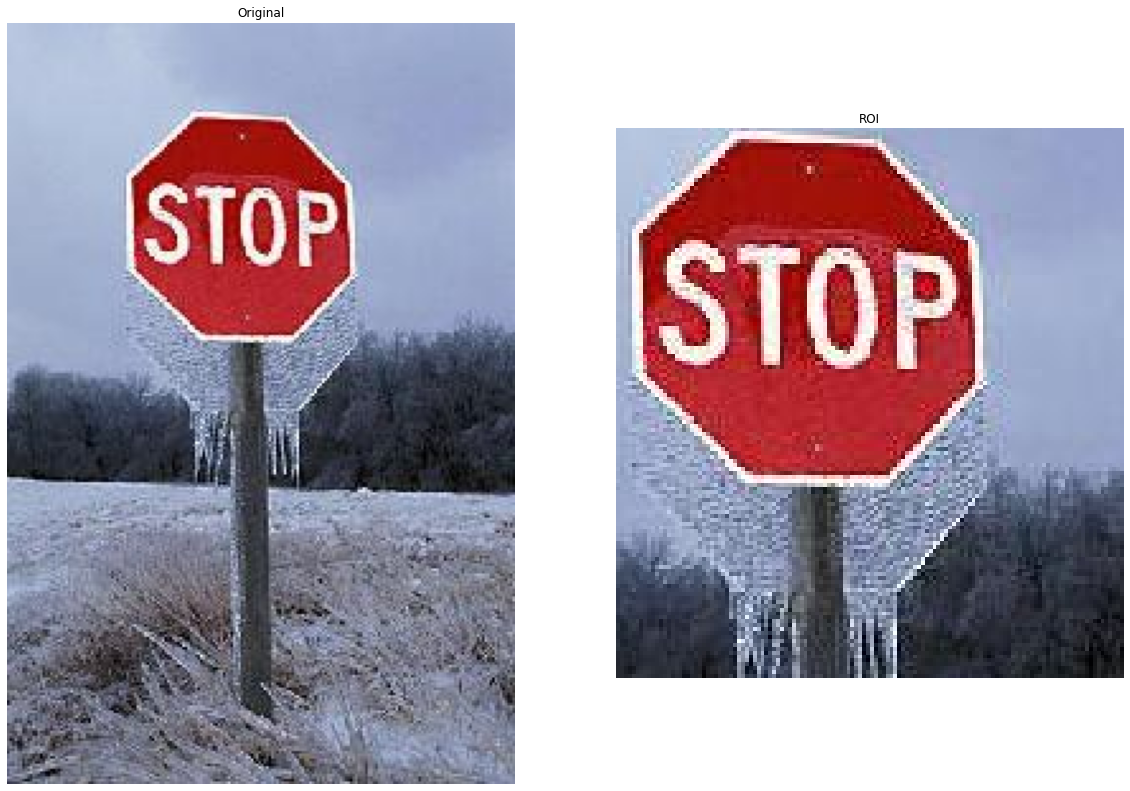

In [23]:
# let's extract the ROI from the image
x = annotations[0][2]
y = annotations[0][0]
w = annotations[0][1]
h = annotations[0][3]
roi = image[y:y+h, x:x+w]

plt.figure(figsize=(20, 20))
plt.subplot(121)
plt.title('Original')
plt.axis('off')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.subplot(122)
plt.title('ROI')
plt.axis('off')
plt.imshow(cv2.cvtColor(roi, cv2.COLOR_BGR2RGB))

In [24]:
# Training our object detector
options = dlib.simple_object_detector_training_options()
images = []
boxes = []
 
# loads both images and annotations data
for imagePath in paths.list_images("images/dataset/101_ObjectCategories/stop_sign/"):
    imageID = imagePath[imagePath.rfind("/") + 1:].split("_")[1]
    imageID = imageID.replace(".jpg", "")
    p = "{}/annotation_{}.mat".format("images/dataset/Annotations/stop_sign/", imageID)
    annotations = loadmat(p)["box_coord"]

    bb = [dlib.rectangle(left=int(x), top=int(y), right=int(w), bottom=int(h))
            for (y, h, x, w) in annotations]
    boxes.append(bb)
 
    images.append(io.imread(imagePath))
    
print("[INFO] training detector...")
detector = dlib.train_simple_object_detector(images, boxes, options)
 
print("[INFO] dumping classifier to file...")
detector.save("stop_signal_detector.svm")
 
win = dlib.image_window()
win.set_image(detector)
dlib.hit_enter_to_continue()

[INFO] training detector...
[INFO] dumping classifier to file...


images/testing/image-3.jpeg
images/testing/image-4.jpeg
images/testing/image-2.jpeg
images/testing/image-1.jpeg
images/testing/image-5.jpeg


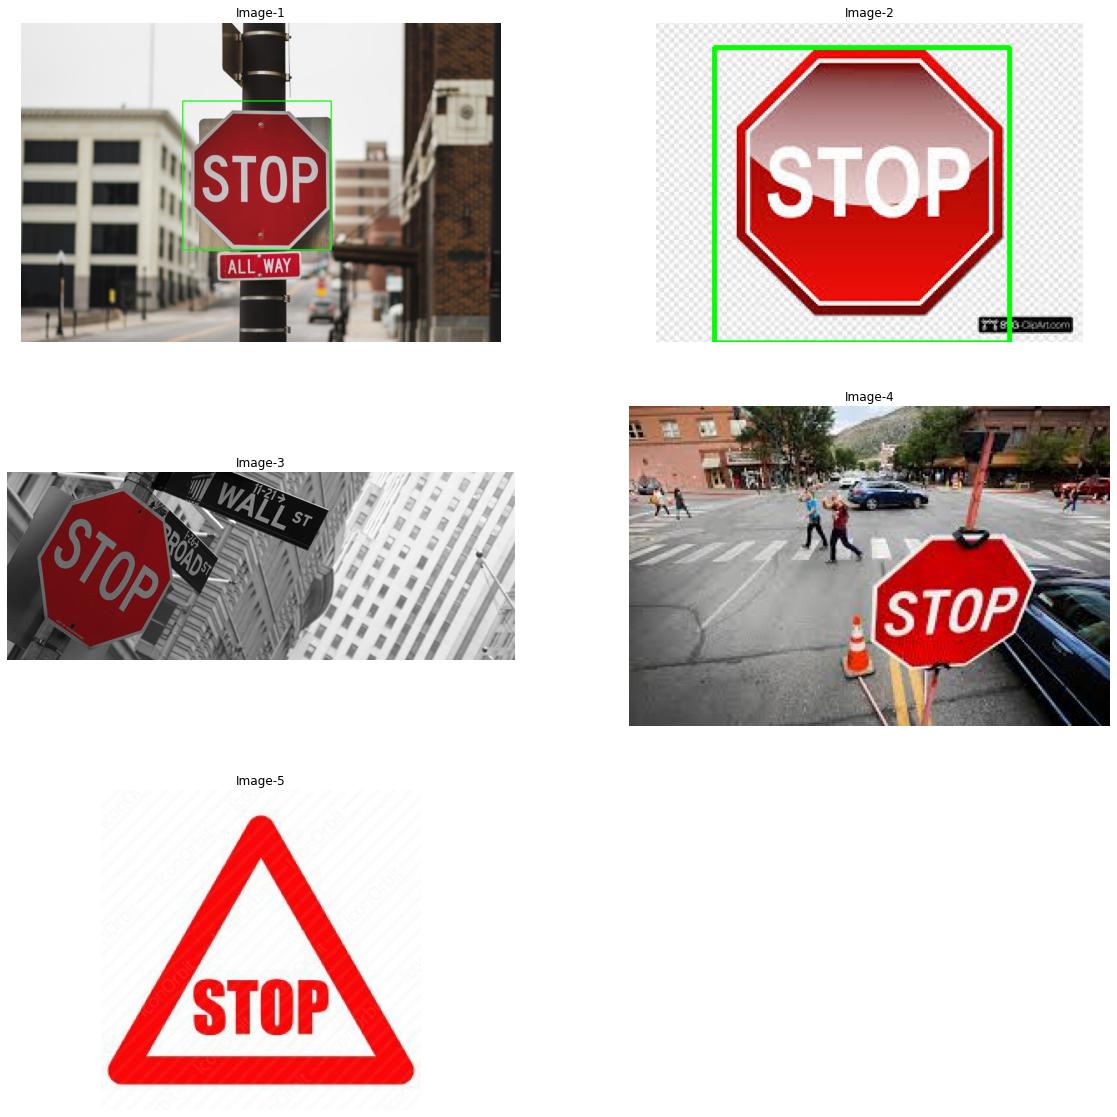

In [27]:
def draw_detector(image_path):
    print(image_path)
    img = cv2.imread(image_path)
    image = img.copy()
    boxes = detector(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
 
    for b in boxes:
        (x, y, w, h) = (b.left(), b.top(), b.right(), b.bottom())
        cv2.rectangle(image, (x, y), (w, h), (0, 255, 0), 2)
    return image

images = []
for image_path in paths.list_images("images/testing/"):
    images.append(draw_detector(image_path))
        
plt.figure(figsize=(20, 20))
plt.subplot(321)
plt.title('Image-1')
plt.axis('off')
plt.imshow(cv2.cvtColor(images[0], cv2.COLOR_BGR2RGB))

plt.subplot(322)
plt.title('Image-2')
plt.axis('off')
plt.imshow(cv2.cvtColor(images[1], cv2.COLOR_BGR2RGB))

plt.subplot(323)
plt.title('Image-3')
plt.axis('off')
plt.imshow(cv2.cvtColor(images[2], cv2.COLOR_BGR2RGB))

plt.subplot(324)
plt.title('Image-4')
plt.axis('off')
plt.imshow(cv2.cvtColor(images[3], cv2.COLOR_BGR2RGB))

plt.subplot(325)
plt.title('Image-5')
plt.axis('off')
plt.imshow(cv2.cvtColor(images[4], cv2.COLOR_BGR2RGB))
